# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset

In [2]:
import kagglehub
import os

print("⬇️ Downloading dataset from Kaggle...")

# Download the dataset
dataset_path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

# Path to the Resume.csv file inside the dataset
csv_path = os.path.join(dataset_path, "Resume", "Resume.csv")

print(f"✅ Dataset downloaded at: {csv_path}")

⬇️ Downloading dataset from Kaggle...
✅ Dataset downloaded at: /kaggle/input/resume-dataset/Resume/Resume.csv


In [3]:
df = pd.read_csv(csv_path)

In [4]:
df = df[['Resume_str', 'Category']].dropna()
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [5]:
df.shape

(2484, 2)

# Exploring Categories

In [6]:
df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


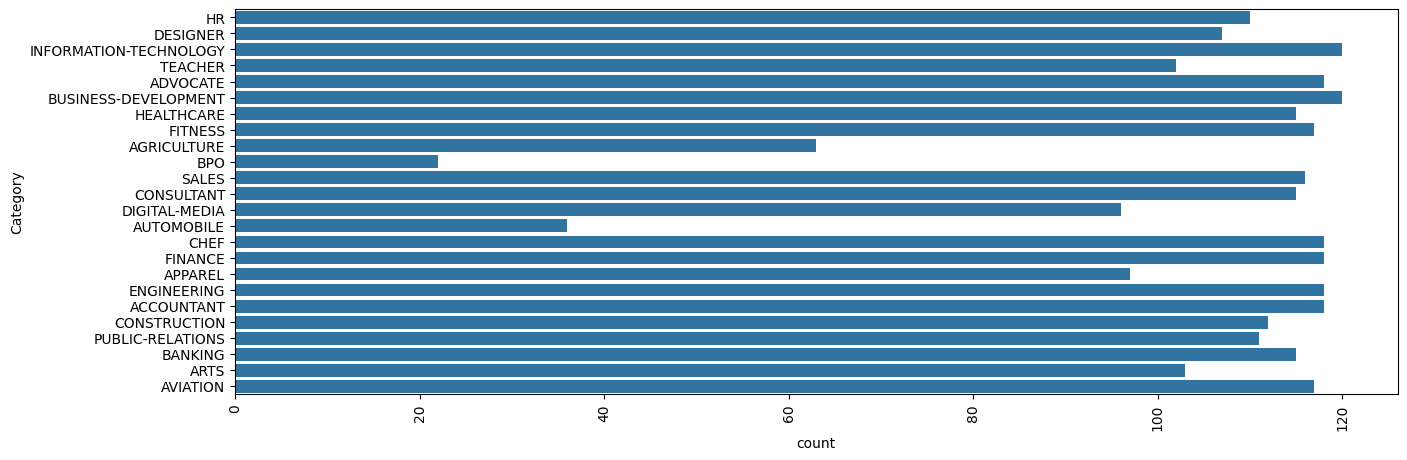

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [8]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

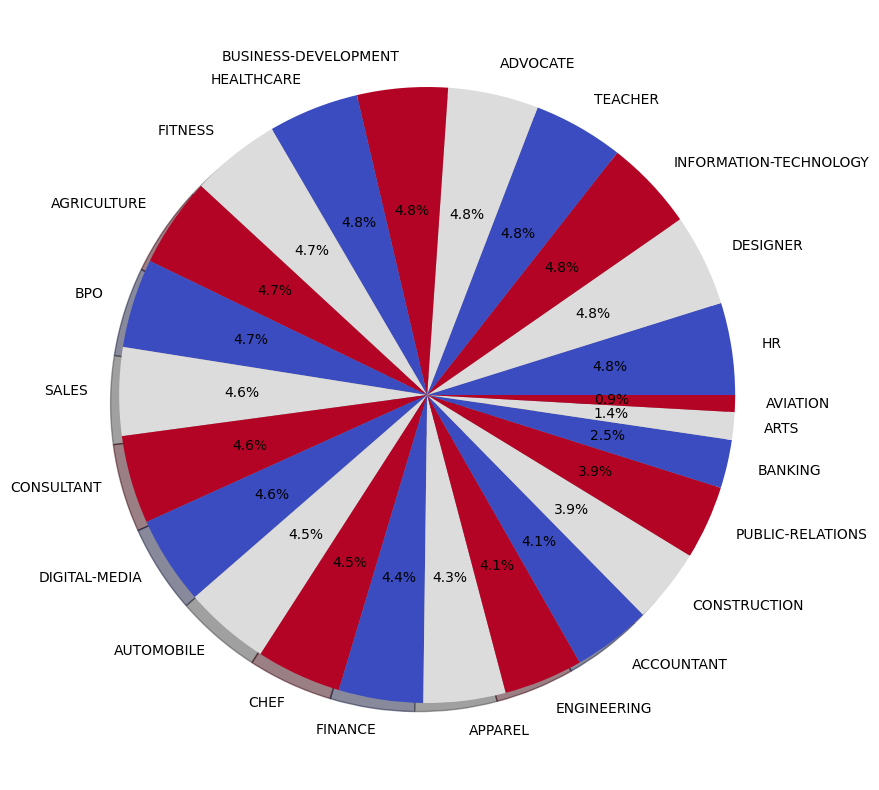

In [9]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

# Exploring Resume

In [10]:
df['Category'][0]

'HR'

In [11]:
df['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

# Balance Classes (Categories)

In [12]:
# Check the original category distribution
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
CONSULTANT                120
DIGITAL-MEDIA             120
TEACHER                   120
HEALTHCARE                120
BPO                       120


<ipython-input-12-58fa04a1b064>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


# Cleaning Data
#### (URLs, Hashtags, Mentions, Special Letters, Punctuations)

In [13]:
import re

def cleanResume(txt):
    cleanText = re.sub(r'http\S+\s', ' ', txt)
    cleanText = re.sub(r'RT', ' ', cleanText)
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', '  ', cleanText)
    cleanText = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub(r'\s+', ' ', cleanText)
    return cleanText


In [14]:
cleanResume("my #### $ #  #suchismita's website is like this http://helloworld and access it @gmail.com")

'my website is like this and access it '

In [15]:
df['Resume_str'] = df['Resume_str'].apply(lambda x: cleanResume(x))

In [16]:
df['Resume_str'][0]

' CONSULTANT Professional Profile Highly motivated and self driven Systems Analyst with vast experience in various environments and technologies in support of multiple departments across the enterprise Expertise in Software Development Lifecycle SDLC and Computer Systems Validation CSV Looking for an opportunity to apply and develop strong analytical skills and problem solving techniques Qualifications Documentum DCM and Documentum D2 MS Access VBA C C some HTML Assembly language programming Project leadership strong technical skills analytical skills problem solving skills organizational skills and communication skills Systems analyst general application support software development data communications System administration Expertise in SDLC on small to large projects Proficient in SDLC and Computer Systems Validation Requirements and Documentation Experience Consultant January 1999 to November 2015 Company Name City State Provides consultant expertise in various roles supporting McNe

# Words into Categorical Values

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [19]:
df.Category.unique()

array([12, 14, 23, 18,  8,  0,  5, 21, 22,  4, 13,  6, 20, 11, 10,  7,  9,
       17, 16, 15, 19,  3,  2,  1])

# Vectorization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume_str'])
requiredText  = tfidf.transform(df['Resume_str'])

# Splitting

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [22]:
X_train.shape

(2304, 32829)

In [23]:
X_test.shape

(576, 32829)

# Training the Model and Printing Classification Report

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.6615
Confusion Matrix:
[[19  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  4  0  0  0  4  0  0  1  2  0  0  1  0  0  0  0  1  6  0  0  1  1  5]
 [ 3  1 13  0  0  0  0  0  0  2  0  0  0  0  0  0  0  3  0  0  1  0  2  1]
 [ 1  7  0 11  0  0  0  0  0  2  0  0  0  1  1  0  0  0  0  0  0  1  0  2]
 [ 0  2  1  1  9  0  0  0  0  3  3  0  1  0  2  0  0  0  1  0  1  1  0  1]
 [ 0  0  0  0  0 27  0  0  4  0  0  0  1  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  9  0  0  0  1  1  0  0  0  4  0  1  1  1  1  0  1  0]
 [ 0  0  0  0  0  0  0 10  1  0  0  0  1  0  0  0  2  0  2  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0 13  0  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  0  0 23  0  1  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 18  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  2  0  0  2  0  2

In [25]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.8681
Confusion Matrix:
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  3  0  0  0  2  2]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0  0  0  1  1]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  2  0  0  0  0  0  1  1  0  0  4]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  3  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  2  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0 15  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  1  0  0  0  2  1  0 13  0  0  3  

In [26]:
# 3. Train RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.8472
Confusion Matrix:
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  1  0  0  0  1  0  0  1  0  1  0  0  0  0  1  1  0  0  0  1  4]
 [ 0  0 23  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0 19  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  2  2  0]
 [ 0  0  1  0 17  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0  1  4]
 [ 0  0  0  0  0 31  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  2  0  0  0  0  0  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  0  1 

# Saving Files

In [28]:
import pickle
pickle.dump(tfidf,open('/content/model/tfidf.pkl','wb'))
pickle.dump(svc_model, open('/content/model/clf.pkl', 'wb'))
pickle.dump(le, open("/content/model/encoder.pkl",'wb'))

# Prediction System

In [29]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume)

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])

    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [31]:
myresume = """Marilyn Hunter
 Summary
 Focused on providing professional service and support to every office visitor. Diligent about scheduling appointments, managing packages and
 routing mail to recipients. Positive nature with excellent people skills.
 Flexible hard worker ready to learn and contribute to team success.
 Skills
 Behavior modeling
 Compliance
 Leadership
 Teambuilding
 Work ethic
 Multitasking
 Active listening
 Troubleshooting
 Individualized care
 Multi-line telephone skills
 Office equipment operations
 Organization and efficiency
 Meticulous and organized
 Security understanding
 Experience
 Substitute Teacher | Company Name - City , State | 08/2015 - 03/2020
 Enforced classroom routines to keep students on schedule and operating at consistent level.
 Implemented lesson plans assigned by classroom teacher to educate students about key concepts.
 Provided notes and reports on school day activities to primary teacher.
 Requested as substitute teacher based on excellent referrals and trusted performance.
 Engaged students in discussions to promote interest and drive learning.
 Educated students in various subjects to provide seamless transition during absence of head teacher.
 Maintained student attendance and assignment records to prevent lapses during teacher absences.
 Differentiated classroom and small group instruction to meet needs of students with various learning styles and abilities.
 Helped students build learning and study skills to achieve educational goals.
 Engaged students and boosted understanding of material using focused instructional strategies and hands-on activities.
 Reported problem students to principal to maintain control of classroom.
 Managed high school classrooms during teacher absences.
 Stayed up to date with current regional curriculums to maintain readiness for long- and short-term substitute jobs.
 Oversaw pop quizzes, material exams and standardized tests to facilitate instruction.
 Assigned homework to students based on curricula and modified based on daily progress.
 Promoted learning by leveraging traditional and modern instructional strategies.
 Created lesson plans to address requirements of state curriculum.
 Led group sessions to reinforce concepts and applications of course content.
 Assisted fellow teachers with assignment development, special projects, tests, administrative updates and grading.
 Recorded attendance data to report to program managers.
 Taught reading, language arts, mathematics and other subjects utilizing course of study adopted by Board of Education.
 Administered quizzes and tests and documented grades to support accurate record-keeping.
 Taught students during teacher absences and kept up with lesson plans and student assignments.
 Substituted for teachers to practice handling classrooms of students.
 Elementary Computer Teacher | Company Name - City , State | 08/1999 - 09/2002
 Created tests and assignments to assess student knowledge of presented coursework and lecture materials.
 Facilitated computer lab sessions, supervising such tasks as penetration testing, coding and script creation.
 Developed lectures addressing variety of computer science topics to engage and educate students.
 Built and expanded knowledge of IT trends by attending professional events, including workshops, seminars and conferences.
 Assisted students with developing thesis topics by offering suggestions and contacting appropriate research sources.
 Instructed students on use of technology tools and equipment as well as methods for accessing information.
 Set up and maintained classroom computers and equipment.
 Provided instruction on professional technology use and web etiquette.
 Devised project-based assignments to create opportunity for hands-on practice and skill building.
 Scored student assignments to measure comprehension.
 Attended seminars and workshops to discover latest advances in computer education.
 Crafted educational, straightforward and visually appealing slideshow presentations to guide lectures.
 Evaluated and adjusted course curriculum based on student overall performance and assessments.
 Receptionist | Company Name - City , State | 08/1998 - 06/1999
 Scheduled and confirmed appointments.
 Answered and directed incoming calls using multi-line telephone system.
 Delivered administrative support to team members, including making copies, sending faxes, organizing documents and rearranging schedules.
Maintained daily calendars, set appointments with clients and planned daily o fice events.
 Sorted incoming mail and directed to correct personnel each day.
 Oversaw o fice inventory by restocking supplies and submiting purchase orders.
 Screened and verified visitors for identification credentials and purpose of visit to maintain security of personnel and o fice environment.
 Prepared packages for shipment by generating packing slips and se ting up courier deliveries.
 Directed and oversaw o fice personnel activities.
 Answered phone cals, provided information to calers and connected calers to appropriate people.
 Welcomed patrons to front desk and engaged in friendly conversations while conducting check-in process.
 Managed customer complaints and rectified issues to complete satisfaction.
 Managed o fice paperwork, including scanning documents and routing business correspondence.
 Puled and organized requested documentation.
 Greeted visitors and directed them to appropriate areas, verifying reasons for visit and verified information.
 Determined needs of visitors and provided information or solutions.
 Signed for packages, recorded al deliveries and distributed to personnel.
 Delivered key administrative support to coworkers, taking on additional tasks during peak times.
 Maintained accurate bookkeeping of important files and ran reports and delivered updates on occupancy and revenues to supervisor.
 Maintained o fice safety by screening visitors, updating logs and issuing temporary passes.
 Education and Training
 Albany State University | City , State | 05/1986 Bachelor of Science : Psychology
"""

pred(myresume)

'TEACHER'

In [32]:
myresume = """EXECUTIVE CHEF
 Professional Summary
 To join an organization that wil alow me to apply my experience and knowledge.
 Skils
 Work History
 Executive Chef , 01/2008 to Current
Company Name â€“ City , State
Prepare daily meal preparation for 500 & 4000 man "Work Force Camps" in remote locations with 4 daily meals and transportable
 lunches.
 Provision & Prepare meals for Commercial Fishing crews of 250 Individuals.
 Develop and cost menu items for targeted food cost.
 Establish & maintain purveyor relationships.
 Negotiate property, equipment leases and sales.
 Oversee Food & Beverage operations for multiple site locations to include administration of weekly purchasing budget.
 Establish par/prep standards, i.e.
 FIFO, label and dating foods.
 Perform/Train sta f in al "line" positions & FOH/BOH functions as required.
 Interview, hire, train & review employees as necessary.
 Maintain consistent interviewing and hiring practices.
 Develop and create al banquet/catering menus.
 Plan al private and special events.
 Maintain consistent HACCP, Serve-Safe and Alcohol Service standards and relative documentation wherever required.
 Direct Supervision of 25-50 Employees.
 Oversee al Retail operations.
 Recipe Design/Menu Engineering.
 Manage procurement & Logistics for al outlets Retail & Hospitality Maintain High level of Customer Service Business Plan Development
 Location Evaluation Management Services Menu Design & Layout Restaurant & Brewery Design Equipment Purchasing Design
 Consultation Restaurant Systems and Policies Author employee standards manual.
 Create and facilitate al sta f training manuals and related position testing.
 Budgeting & Financial Controls Develop/implement al marketing & advertising strategies.
 Analyze and implement necessary changes to improve guest service or sta f e ficiency.
 Sales Floor Merchandising/Planograms.
 Recipe Development/Menu Engineering.
 Operations , 01/1997 to 01/2000
Company Name â€“ City , State
Corporate Menu Development, Costing, and Procurement/Logistics for Remote Camps Contract Negotiations for Food Brokerage and
 Shipping.
 Planning and preparing daily meals for passengers and crew.
 Vendor Relationships and price negotiations.
 Solid relationships with Culinary Unions.
 Responsible for safe and organized operation of galey.
 Organized and planned galey tours for onboard passengers.
 Positive and consistent interaction with passengers.
 Serve-Safe CFPM, HACCP USDA/FDA, Alaska, Washington, Oregon Certified Food Handler.
 Budget forecasting for al individual restaurant entities to include food, labor and beverage and diverse costs based upon specific operations.
 Operational adherence for Franchisee of 2 QSR and other Fast Food operations to include corporate oversight of Food, Labor and
 Controlable Costs.
 QSR 18-21% Ful Service 30-32% & Overal labor costs) Responsible for ordering & inventory control.
 Oversee complete Food & Beverage Operations of multiple ful service restaurants.
 Manage the production of 175-400 covers nightly with 5-8m in annual sales.
 Supervision of 475 Seasonal & Fultime Sta f with multiple locations.
 Training al FOH to include Wine & Beverage service and relative food pairings.
 Training of al BOH to include Food Handling, Safe Practices, FIFO and Kitchen Systems and recipe/plating adherence.
 Recipe Design/Menu Engineering Corporate Chef Of 10 Vessel Organization SALES/MARKETING Sales, Merchandising and delivery of
 high quality varietal wines, foods and beverages.
 Customer Service Training for Sales Sta f Overal vineyard management of 37 acres.
 Product Sales Forecasting and Ordering Trends.
 Sales Sta f Training & Merchandising.
 Develop Strategic Sales and Marketing Plan.
 Co-host weekly radio show.
 Responsible for performance reviews of al Sales & Culinary Sta f.
 Oversee Weekly Sales Meetings & Supervision of 15 Sales Sta f.
Store Set/Re-Set According To Plan-O-Gram.
 Implement and Develop Key Performance indicators for al sta f, both Sales and Culinary Divisions.
 Create & Develop Sales Incentive Programs Primary Organizer for Community & Catering/Banquet Events.
 Implement Bi-Annual Sales Retreats.
 Route Sales.
 The above listed experience was the parent company of Food Service Associates)Castile Trucking, The Shanghai CafÃ©, Tai-Tung, Four
Seas, Alaska Sightseeing Cruise West, Chili's of Westminster, Wendy's Of The Rockies, The Galery Restaurant & Lounge (2 Locations)
 The Quality Hotel Tacoma Dome, Crown Pacific Inn, Ernst Home Centers , Paul's Grocery, Mt Baker Vineyards & The Hungry Halibut
 Restaurant & Lounge.
 01/1986 to 01/2008
Education
 M.S : Hospitality Management , Wing Luke University, Shanghai Province, Peoples Republic of China -
Hospitality Management
 B.P.S : Culinary Management , Culinary Management
 Accomplishments
 Skils
 U.S.
 Naval Culinary Training, USNTC, San Diego, Ca.
 USS Esteem MSO-438, Member of US.
 Naval Culinary Team 1977-1980 Internship-Victor Rosselini, Owner, Rosselini's 410, Sea tle, Washington Internship-Tro ter's Restaurant,
 Chicago, Ilinois LICENSES/AFFILIATIONS American Culinary Federation # 234185 C.E.C.
 SERVE SAFE #7361161, HACCP, USDA/FDA, Alaska, Washington and Oregon Food Handler's Card TIPS/TAMS Certification,
 National Restaurant Assoc, Pro-Start Mentor/Coach NSTC Certification, First-Aid, CPR & AED, TWIC, FAA Security Clearance and
 Merchant Mariner's Documents- United States Coast Guard.
 advertising, Budgeting, Budget, Bi, Business Plan Development, Consultation, Contract Negotiations, Customer Service, Customer Service
 Training, delivery, documentation, special events, Fast, Financial, forecasting, hiring, inventory control, Layout, Logistics, Marketing Plan,
 marketing, Meetings, Merchandising, negotiations, Organizer, performance reviews, Policies, Procurement, Purchasing, Quality, radio, Retail,
 SALES, Sales Forecasting, Shipping, Sta f Training, Strategic, Supervision, Author
"""

pred(myresume)

'CHEF'

In [33]:
myresume = """ENGINEERING INTERN
 Skils
 C++, Python, MATLAB, Git, Bash, R, SQL (basic). Experienced in Linux/Unix and using high performance computing clusters.
 Machine Learning Tools and Libraries: Scikit-learn, Pandas, Seaborn, matplotlib, TensorFlow (basic). (I built a XGBoost
 model that has 77.5% accuracy in the Kaggle Titanic chalenge.)
 Computational Fluid Dynamics and Discrete Element Method Codes
 CFD-DEM, OpenFOAM, CFD-ACE+Â®, FluentÂ®, COMSOLÂ®, LAMMPS, and LIGGGHTS.
 Reservoir and Fracture Modeling Tools
 CMGÂ® for reservoir simulation; FracProÂ® for fracture simulation and analysis; Saphir for pressure transient analysis.
 Experimental and Statistical Methods
 SEM, AFM, Confocal Microscopy, Regression analysis, Statistical process control, Design of experiments.
 Experience
 ENGINEERING INTERN 08/2016 ï¼ 12/2016 Company Name State
 Project: Develop a cavings transport model for optimizing hole-cleaning operations.
 Developed a solids transport model for predicting cutings/cavings bed height during a hole-cleaning operation.
 In contrast to conventional CFD models that typicaly take several hours to run, this novel numerical model can obtain results within a few
 minutes, enabling timely optimization of the wel circulation schedule.
 Investigated the competitive landscape and designed the commercialization plan for the numerical model.
 Leveraged the experiences from internal driling experts and aligned with al stakeholders throughout the development process.
 ENGINEERING INTERN 05/2016 ï¼ 08/2016 City , State
 Project: Optimize diverter pumping schedule for be ter production performance after wel re-stimulation.
 Built a simulator to model proppant, diverter, and slurry distribution in a plug-and-perf hydraulic fracturing operation.
 Derived a simple proxy model to substitute time-consuming CFD-DEM simulations for predicting diverter transport through perforation
 clusters.
 Simulation time drops from 48+ hours to less than 1 sec.
 Provided recommendations for pumping schedule design in a fracturing treatment.
 PROCESS ENGINEER 04/2012 ï¼ 05/2013 Company Name City
 Improve display yield through statistical modeling, process control, and tool modifications.
 Won Qualstar award in Nov.
 2012 by completing two specific yield improvement tasks in merely two months, first time for QMT-TW to award its engineers after
 establishment.
 Optimized sealing process of interferometric modulator (iMoD) display that led to 52% pre-functional yield increase.
 Increased the up time of panel encapsulation station from 73% to 92% by leading two tool-modification projects involving a group of 5
 equipment engineers and 2 external support engineers from Japan.
 PROPPANT/DIVERTER TRANSPORT in HORIZONTAL WELLS, UT Austin Aug.
 2014-present.
 Evaluate the e ficiency of proppant/diverter transport in perforated horizontal wels under diferent slurry flow conditions using a combined
 CFD-DEM approach.
 Developed a multivariate statistical model to substitute traditional CFD model for predicting proppant transport through perforations at
 various flow conditions.
 The computational cost dropped 5 orders of magnitude.
 Accurately predicted DAS-measured proppant distribution in a field case with less than 10% error.
 Chu-Hsiang Wu Page 2 DESIGN and SELECTION of GRAVEL PACK and SAND CONTROL SCREENS, UT Austin Jun.
 2013-present.
 Develop analytical, DEM, and Monte Carlo models for predicting sand production through gravel packs and sand control screens.
 Accurately predicted 6 sand production lab-test results obtained from operators with less than 15% error using the developed model.
 Invented a DEM-based approach for extracting pore throat size distribution of complex packings.
 Results show that the pore throat sizes within gravel packs are usualy between 1/5 to 1/9 of the e fective gravel size.
 The findings correspond remarkably wel with previous field observations and enable further optimization of gravel pack designs.
 06/2010 Company Name
 Designed highly mixing-e ficient serpentine channels for biomedical detection.
 Devised mixing index to quantify mixing e ficiency of two heterogeneous fluids flowing in microfluidic channels.
 Interests
 SPE translator, Nepal medical assistance group, cofounder of Taiwan Bio-Nano Youth Initiative. SELECTED PUBLICATIONS Â· Wu, C.-H.,
 Sharma, M. M. 2017. A DEM-based approach for evaluating the pore throat size distribution of a filter medium, Powder Technology, ISSN
 0032-5910, htps:/doi.org/10.1016/j.powtec.2017.09.018. Â· Wu, C.-H., Sharma, M. M., Chanpura, R. et al. 2017. Factors Governing the
 Predicted Performance of Multilayered Metal-Mesh Screens. SPE Driling & Completion. SPE-178955-PA. htps:/doi.org/10.2118/178955-PA.
Â· Wu, C.-H., Sharma, M. M. 2016. Efect of Perforation Geometry and Orientation on Proppant Placement in Perforation Clusters in a
 Horizontal Wel. Paper SPE-179117-MS was presented at the SPE Hydraulic Fracturing Technology Conference, The Woodlands, TX, USA, 9
11 February 2016. Wu, C.-H., Yi, S., Sharma, M. M. 2017. Proppant Distribution Among Multiple Perforation Clusters in a Horizontal
 Welbore. Paper SPE-184861-MS was presented at the SPE Hydraulic Fracturing Technology Conference, The Woodlands, TX, USA, 24-26
 January 2017. Â· Mondal, S., Wu, C.-H., Sharma, M. M. et al. 2016. Characterizing, Designing, and Selecting Metal Mesh Screens for
 Standalone-Screen Applications. SPE Dril & Compl 31 (2): 85-94. SPE-170935-PA. htp:/dx.doi.org/10.2118/170935-PA. Â· Mondal, S.,
 Wu, C.-H., Sharma, M. M. 2016. Coupled CFD-DEM Simulation of Hydrodynamic Bridging at Constrictions. Int. J. Multiph. Flow, Vol. 84, pp.
 245-263, ISSN 0301-9322, htp:/dx.doi.org/10.1016/j.ijmultiphaseflow.2016.05.001. Â· Zhang, K., Chanpura, R. A., Mondal, S., Wu, C.-H.,
 Sharma, M. M., Ayoub, J. A., & Parlar, M. 2015. Particle Size
 Education and Training
 May 2018 Ph.D : UT Austin - PETROLEUM ENGINEERING Scientific Computation City , State PETROLEUM ENGINEERING Scientific
 Computation Dissertation: Modeling Particulate Flows in Conduits and Porous Media; Supervisor: Mukul M. Sharma 3.9/4.0 Recipient of
 ConocoPhilips Felowship (2013), and Jack L. Thurber Memorial Endowed Presidential Scholarship
 Jun. 2010 M.S : National Taiwan University - MECHANICAL ENGINEERING City , Taiwan MECHANICAL ENGINEERING Design of a
 mixing-e ficient microfluidic device for bio-medical applications 3.9/4.0
 Jun. 2008 B.S : National Tsing Hua University - POWER MECHANICAL ENGINEERING City , Taiwan POWER MECHANICAL
 ENGINEERING Presidential Award and Scholarship (2006, 2007)
 Skils
 approach, Bash, basic, C++, competitive, DAS, Design of experiments, functional, lab-test, Linux, Machine Learning, MATLAB, Modeling,
 novel, optimization, process control, Programming, proxy, Python, Simulation, SQL, Statistical process control, Supervisor, Unix
 Additional Information
 LEADERSHIP and VOLUNTEER Â· Served as a Second Lieutenant in an artilery company in the Taiwan Army during 2010-2011. Â·
 Qualstar Award, Qualcomm, 2012 and 2013 Â· Qualcomm Know-how Incentive Award, Qualcomm, 2013 Â· Technical Editor of SPE
 Journal, SPE Driling and Completion, SPE Production and Operations, 2017-present Â· Volunteer experience: SPE translator, Nepal
 medical assistance group, cofounder of Taiwan Bio-Nano Youth Initiative. SELECTED PUBLICATIONS Â· Wu, C.-H., Sharma, M. M.
 2017. A DEM-based approach for evaluating the pore throat size distribution of a filter medium, Powder Technology, ISSN 0032-5910,
 htps:/doi.org/10.1016/j.powtec.2017.09.018. Â· Wu, C.-H., Sharma, M. M., Chanpura, R. et al. 2017. Factors Governing the Predicted
 Performance of Multilayered Metal-Mesh Screens. SPE Driling & Completion. SPE-178955-PA. htps:/doi.org/10.2118/178955-PA. Â·
 Wu, C.-H., Sharma, M. M. 2016. Efect of Perforation Geometry and Orientation on Proppant Placement in Perforation Clusters in a
 Horizontal Wel. Paper SPE-179117-MS was presented at the SPE Hydraulic Fracturing Technology Conference, The Woodlands, TX,
 USA, 9-11 February 2016. Wu, C.-H., Yi, S., Sharma, M. M. 2017. Proppant Distribution Among Multiple Perforation Clusters in a
 Horizontal Welbore. Paper SPE-184861-MS was presented at the SPE Hydraulic Fracturing Technology Conference, The Woodlands,
 TX, USA, 24-26 January 2017. Â· Mondal, S., Wu, C.-H., Sharma, M. M. et al. 2016. Characterizing, Designing, and Selecting Metal
 Mesh Screens for Standalone-Screen Applications. SPE Dril & Compl 31 (2): 85-94. SPE-170935-PA.
 htp:/dx.doi.org/10.2118/170935-PA. Â· Mondal, S., Wu, C.-H., Sharma, M. M. 2016. Coupled CFD-DEM Simulation of
 Hydrodynamic Bridging at Constrictions. Int. J. Multiph. Flow, Vol. 84, pp. 245-263, ISSN 0301-9322,
 htp:/dx.doi.org/10.1016/j.ijmultiphaseflow.2016.05.001. Â· Zhang, K., Chanpura, R. A., Mondal, S., Wu, C.-H., Sharma, M. M.,
 Ayoub, J. A., & Parlar, M. 2015. Particle Size Distribution Measurement Techniques and Their Relevance or Irrelevance to Sand Control
 Design. SPE Dril & Compl 30 (2): 164-174. SPE-168152-PA. htp:/dx.doi.org/10.2118/168152-PA.
"""

pred(myresume)

'ENGINEERING'